In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets ,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline




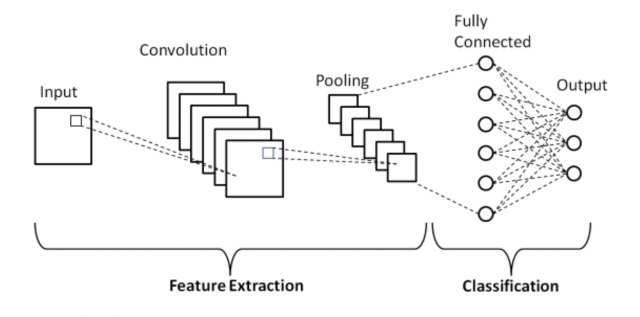

In [30]:
# Convert MNIST image files into a tensor of 4-Dimensions (#images, height, width, color channel)
transform =transforms.ToTensor()


In [31]:
#TRain data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [32]:
#Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [33]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [34]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [35]:
# Create a small batch size for images = 10
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=False)

In PyTorch, the `Conv2d` layer represents a 2D convolutional layer, commonly used in convolutional neural networks (CNNs) for image processing tasks. The parameters for `nn.Conv2d(in_channels, out_channels, kernel_size, stride)` define the behavior of this layer. Here’s a breakdown for `conv1 = nn.Conv2d(1, 6, 3, 1)`:



---


1. **`in_channels=1`**: This specifies the number of input channels for the convolution. In this case, it's set to `1`, meaning the input has one channel (like a grayscale image). If it were an RGB image, you would set this to `3`.

2. **`out_channels=6`**: This specifies the number of output channels (also known as filters) the convolution will produce. Here, it's set to `6`, which means the layer will produce six different feature maps after applying the convolution.

3. **`kernel_size=3`**: This parameter determines the size of the convolutional kernel (filter). In this case, `3` means it will use a `3x3` kernel to scan across the image. This kernel size determines the receptive field over the input.

4. **`stride=1`**: This parameter sets the step size the kernel will take as it moves across the image. A stride of `1` means the kernel moves one pixel at a time. A higher stride reduces the spatial dimensions of the output.

This convolutional layer will transform the input image with one channel into an output with six channels, applying six separate `3x3` filters across the image with a stride of 1.

In [36]:
#Define or CNN Model
#Describe convolutional layer (2 cnn)
conv1 =nn.Conv2d(1,6,3,1)
conv2 =nn.Conv2d(6,16,3,1)

In [37]:
# Grab 1 MNIST record
for i, (X_train, y_train) in enumerate(train_data):
  break

In [38]:
X_train.shape

torch.Size([1, 28, 28])

In [39]:
x = X_train.view(1,1,28,28)

In [40]:
#Perform our first convolution
x = F.relu(conv1(x)) #Rectified Linear unit

In [41]:
x.shape
#The reason why it's now 26x26 is because it automatically sets a padding and removes 2 pixels from each side if we do not specify this number,
# in this case it does not matter
# but in later projects we whould be careful with this since we may lose data

torch.Size([1, 6, 26, 26])

In [43]:
# pass thru the pooling layer
x = F.max_pool2d(x, 2,2) #kernel of 2 and stride of  2

In [45]:
x.shape

torch.Size([1, 6, 13, 13])

In [46]:
# Second CL
x =F.relu(conv2(x))


In [47]:
x.shape

torch.Size([1, 16, 11, 11])

In [48]:
#pooling layer
x = F.max_pool2d(x,2,2)

In [49]:
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
#MODEL CLASS
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)#2X2 KERNEL AND STRIDE 2
    # SECOND PASS
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)#2X2 KERNEL AND STRIDE 2
    # REVIEW TO FLATTEN IT OUT
    X = X.View(-1,16*5*5) # -1 so that we can vary batch size
    # Fuly connected layers

